# BIODIVERSITY ANALYSES METABARCODING

R packages needed for the follow analyses:


In [27]:
library(tidyverse)
library(phyloseq)
library(DESeq2)
library(dendextend)
library(viridis)

## Files required in the phyleq biodiversity analysis:
**Counting table**:
> In metabarcoding analysis is a data table that summarizes the number of times each DNA sequence (or "read") was observed in a sample.

   >The counting table summarizes the abundance of each identified DNA sequence in the sample. Each row of the table represents a unique DNA sequence, and each column represents a different sample. The values in the table indicate the number of times each sequence was observed in each sample. 

   >The counting table is an important input for metabarcoding analyses, such as **diversity analyses**, community composition comparisons, and statistical tests for differential abundance.
   
**Sample Metadata**:
> Information about the samples being analyzed, such as sample type, sample collection location, and sample collection time, can be important in understanding patterns of diversity and abundance.

**Taxonomy table**
> A taxonomy table is a data table that lists the taxonomic assignments for each sequence in a microbial community. The table typically includes one row for each sequence and columns that represent the taxonomic ranks, such as domain, phylum, class, order, family, genus, and species. 

> The taxonomic assignments for each sequence are usually determined by comparing the sequence to a reference database. 

> Taxonomy tables summarize the taxonomic composition of the community and to compare the relative abundance of taxa between samples or treatments.

> Taxonomy tables are typically saved in a tab-separated text file format, where each row represents a sequence and each column represents a taxonomic rank or other metadata associated with the sequence. The first column of the table usually contains a unique sequence identifier or OTU ID, and the remaining columns contain the taxonomic assignments or other metadata.

# Sample Metadata

In [3]:
sample_info_tab <- read.csv("metadata_ORAL.csv", header= TRUE, row.names= 1,
                       check.names=FALSE, sep=",")
sample_info_tab$color <- as.character(sample_info_tab$COLOUR)
sample_info_tab

,CODE,TYPE,COLOUR,color
,<chr>,<chr>,<chr>,<chr>
AN1,AN1,ANTES,#9E7300,#9E7300
AN2,AN2,ANTES,#9E7300,#9E7300
AN3,AN3,ANTES,#9E7300,#9E7300
AN4,AN4,ANTES,#9E7300,#9E7300
AN5,AN5,ANTES,#9E7300,#9E7300
AN6,AN6,ANTES,#9E7300,#9E7300
AN7,AN7,ANTES,#9E7300,#9E7300
AN8,AN8,ANTES,#9E7300,#9E7300
AN9,AN9,ANTES,#9E7300,#9E7300


# Counting table

In [4]:
count_tab <- as.matrix(read.table("tax_count.tsv"), header = T, 
                           row.names = 1, check.names = F, sep = "\t")
head(count_tab)

,AN1,AN2,AN3,AN4,AN5,AN6,AN7,AN8,AN9,AN10,...,DE3,DE4,DE5,DE6,DE7,DE8,DE9,DE10,DE11,DE12
2,5,2,19,15,5,16,5,17,18,5,...,2,7,9,8,6,8,3,10,9,22
158,0,8,0,2,0,0,0,0,0,3,...,0,0,0,0,1,0,0,0,0,2
163,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
195,0,1,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
199,139,35,6,15,62,72,35,11,42,213,...,4,8,43,3,3,8,0,12,40,77


In [5]:
count_tab <- as.matrix(read.table("tax_count.tsv"), header = TRUE, 
                           row.names = 1, check.names = TRUE, sep = "\t", rownames.force = TRUE, colnames.force = 1)
head(count_tab)

,AN1,AN2,AN3,AN4,AN5,AN6,AN7,AN8,AN9,AN10,...,DE3,DE4,DE5,DE6,DE7,DE8,DE9,DE10,DE11,DE12
2,5,2,19,15,5,16,5,17,18,5,...,2,7,9,8,6,8,3,10,9,22
158,0,8,0,2,0,0,0,0,0,3,...,0,0,0,0,1,0,0,0,0,2
163,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
195,0,1,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
199,139,35,6,15,62,72,35,11,42,213,...,4,8,43,3,3,8,0,12,40,77


# Taxonomy table

In [6]:
tax_tab <- as.matrix(read.table("tax_table.tsv", header=T,
           row.names=1, check.names=F, sep="\t"))

In [7]:
head(tax_tab)

,kingdom,phylum,class,order,family,genus
158,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Treponemataceae,Treponema
163,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Treponemataceae,Treponema
195,Bacteria,Pseudomonadota,Epsilonproteobacteria,Campylobacterales,Campylobacteraceae,Campylobacter
196,Bacteria,Pseudomonadota,Epsilonproteobacteria,Campylobacterales,Campylobacteraceae,Campylobacter
199,Bacteria,Pseudomonadota,Epsilonproteobacteria,Campylobacterales,Campylobacteraceae,Campylobacter
200,Bacteria,Pseudomonadota,Epsilonproteobacteria,Campylobacterales,Campylobacteraceae,Campylobacter


# DEseq STEP for Data normalization: 
> It is important to normalize the sequencing data to account for differences in sequencing depth or other technical factors that could impact the analysis.

In [8]:
deseq_counts <- DESeqDataSetFromMatrix(count_tab, colData = sample_info_tab, design = ~1)
deseq_counts <- estimateSizeFactors(deseq_counts, type = "poscounts")
deseq_counts_vst <- varianceStabilizingTransformation(deseq_counts)
vst_trans_count_tab <- assay(deseq_counts_vst)
head(vst_trans_count_tab)

,AN1,AN2,AN3,AN4,AN5,AN6,AN7,AN8,AN9,AN10,...,DE3,DE4,DE5,DE6,DE7,DE8,DE9,DE10,DE11,DE12
2,2.5075025,1.0714041,4.3542479,4.0939615,2.6641481,4.0153453,2.3938205,4.0509291,4.1139750,2.0552000,...,1.7721710,3.1229974,3.4114441,3.6114868,3.0582571,3.2579376,2.1215848,3.5501140,3.4114441,4.1906529
158,-0.9661316,2.5330929,-0.9661316,1.6234736,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,1.5104388,...,-0.9661316,-0.9661316,-0.9661316,-0.9661316,1.0862689,-0.9661316,-0.9661316,-0.9661316,-0.9661316,1.3142116
163,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,0.8340654,-0.9661316,...,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316
195,-0.9661316,0.5295039,-0.9661316,-0.9661316,-0.9661316,-0.9661316,0.7895039,-0.9661316,-0.9661316,-0.9661316,...,-0.9661316,0.9964105,0.9718751,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316
196,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,0.8426589,-0.9661316,-0.9661316,...,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316,-0.9661316
199,7.0435511,4.4629678,2.8332175,4.0939615,6.0754400,6.1138654,4.9535597,3.4689523,5.2878398,7.0995248,...,2.5648011,3.2954234,5.5570657,2.3731774,2.2128538,3.2579376,-0.9661316,3.7928054,5.4550538,5.9401258


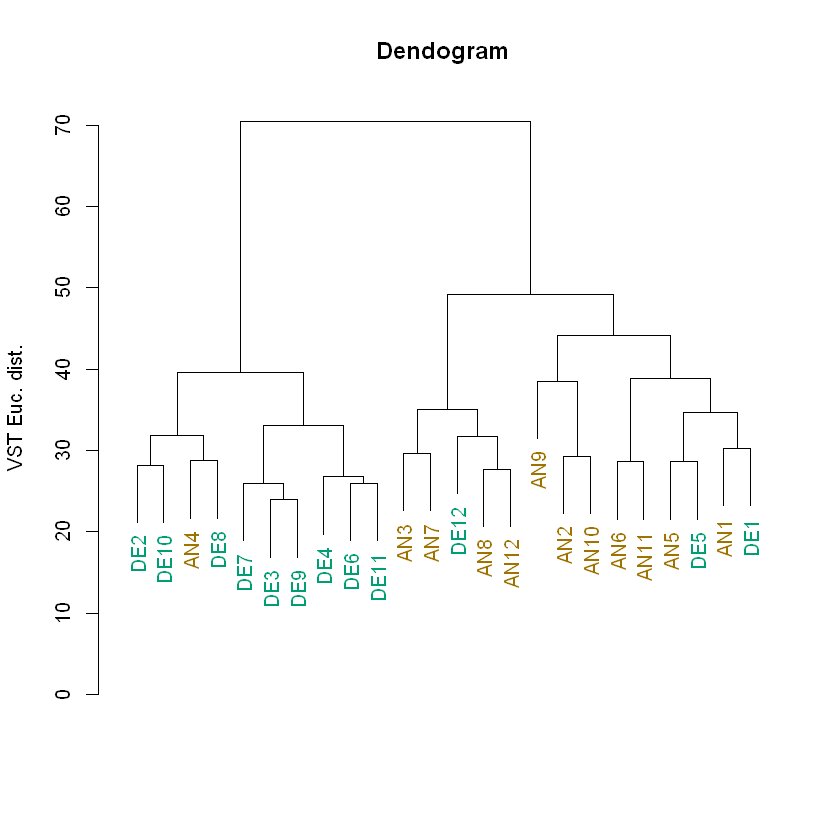

In [9]:
euc_dist <- dist(t(vst_trans_count_tab))
euc_clust <- hclust(euc_dist, method="ward.D2")
euc_dend <- as.dendrogram(euc_clust, hang=0.1)
dend_cols <- as.character(sample_info_tab$color[order.dendrogram(euc_dend)])
labels_colors(euc_dend) <- dend_cols
plot(euc_dend, main="Dendogram", ylab="VST Euc. dist.")

# Phyloseq for PCOa visualization
  ## Sample Metadata for Phyloseq 

- OTU TABLE
- SAMPLE DATA
- PHYLOSEQ OBJECT

In [10]:
vst_count_phy <- otu_table(vst_trans_count_tab, taxa_are_rows=T)
sample_info_tab_phy <- sample_data(sample_info_tab)
vst_physeq <- phyloseq(vst_count_phy, sample_info_tab_phy)

In [11]:
vst_pcoa <- ordinate(vst_physeq, method="MDS", distance="euclidean")
eigen_vals <- vst_pcoa$values$Eigenvalues 

In [12]:
write.table(vst_pcoa$vectors, "MDS.tab")
write.table(vst_pcoa$values, "MDS_values.tab")

# pcoa visuatization

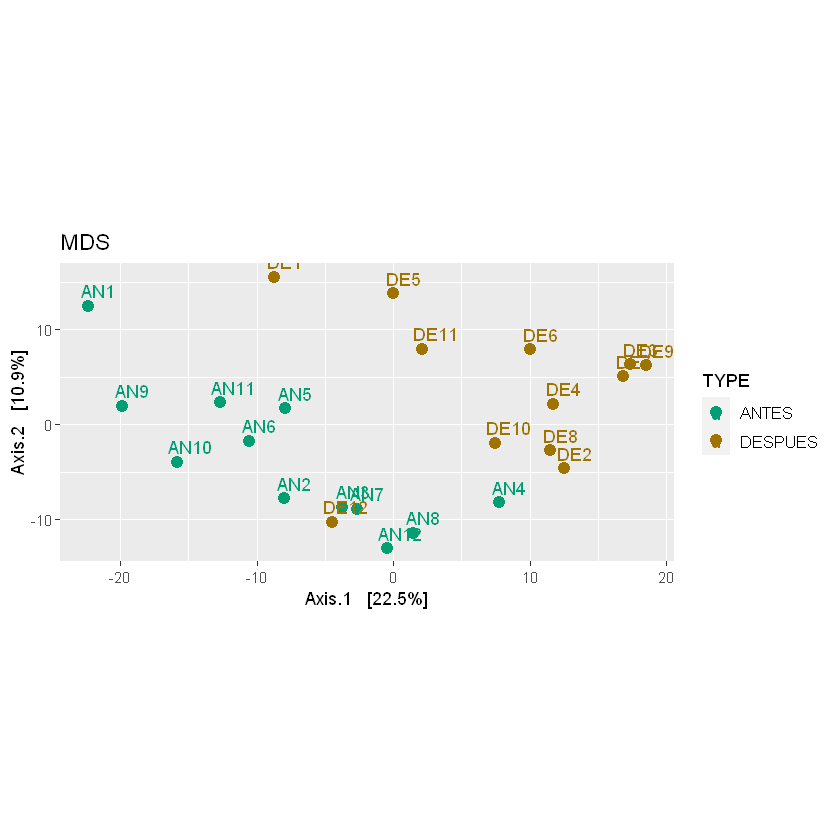

In [13]:
pcoa <- plot_ordination(vst_physeq, vst_pcoa, color="TYPE") + 
  geom_point(size=3) + labs(col="TYPE") + 
  geom_text(aes(label=rownames(sample_info_tab_phy), hjust=+0.2, vjust=-0.6)) + 
  coord_fixed(sqrt(eigen_vals[2]/eigen_vals[1])) + ggtitle("MDS") + 
      scale_color_manual(values=unique(sample_info_tab$COLOUR[order(sample_info_tab$COLOUR)])) + 
  theme(legend.text = element_text(size=10))
pcoa

### Diversity visualization 

In [14]:
count_tab_phy <- otu_table(count_tab, taxa_are_rows=T)

In [15]:
tax_tab_phy <- tax_table(tax_tab)

In [16]:
ASV_physeq <- phyloseq(count_tab_phy, tax_tab_phy, sample_info_tab_phy)

In [17]:
head(count_tab_phy)
head(tax_tab_phy)
ASV_physeq

,AN1,AN2,AN3,AN4,AN5,AN6,AN7,AN8,AN9,AN10,...,DE3,DE4,DE5,DE6,DE7,DE8,DE9,DE10,DE11,DE12
2,5,2,19,15,5,16,5,17,18,5,...,2,7,9,8,6,8,3,10,9,22
158,0,8,0,2,0,0,0,0,0,3,...,0,0,0,0,1,0,0,0,0,2
163,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
195,0,1,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
199,139,35,6,15,62,72,35,11,42,213,...,4,8,43,3,3,8,0,12,40,77


,kingdom,phylum,class,order,family,genus
158,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Treponemataceae,Treponema
163,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Treponemataceae,Treponema
195,Bacteria,Pseudomonadota,Epsilonproteobacteria,Campylobacterales,Campylobacteraceae,Campylobacter
196,Bacteria,Pseudomonadota,Epsilonproteobacteria,Campylobacterales,Campylobacteraceae,Campylobacter
199,Bacteria,Pseudomonadota,Epsilonproteobacteria,Campylobacterales,Campylobacteraceae,Campylobacter
200,Bacteria,Pseudomonadota,Epsilonproteobacteria,Campylobacterales,Campylobacteraceae,Campylobacter


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 655 taxa and 24 samples ]
sample_data() Sample Data:       [ 24 samples by 4 sample variables ]
tax_table()   Taxonomy Table:    [ 655 taxa by 6 taxonomic ranks ]

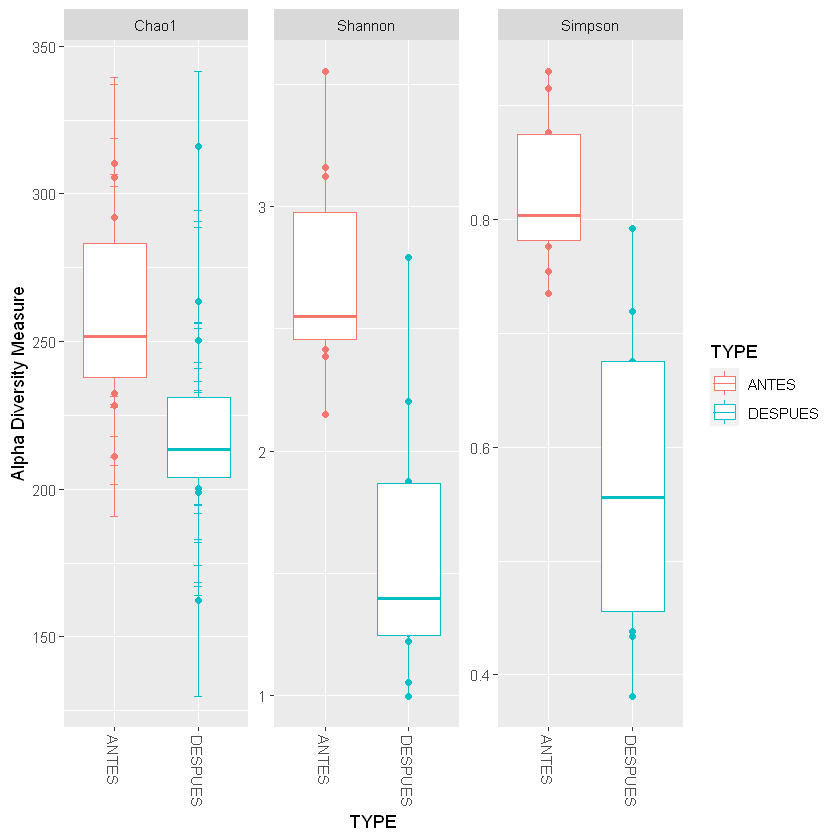

In [20]:
richness <- plot_richness(ASV_physeq,x = "TYPE" , color="TYPE", measures=c("Chao1", "Shannon", "Simpson")) + geom_boxplot()
richness

## stack plot 

In [28]:
clases_counts_tab <- otu_table(tax_glom(ASV_physeq, taxrank="class"))
clases_tax_vec <- as.vector(tax_table(tax_glom(ASV_physeq, taxrank="class"))[,3])
rownames(clases_counts_tab) <- as.vector(clases_tax_vec)

In [29]:
unclassified2_tax_counts <- colSums(count_tab) - colSums(clases_counts_tab)
clases_and_unidentified_counts_tab <- rbind(clases_counts_tab, "Unclassified"=unclassified2_tax_counts)
clases_taxa_counts_tab <- clases_and_unidentified_counts_tab

In [30]:
identical(colSums(clases_taxa_counts_tab), colSums(count_tab))

[1] TRUE

In [31]:
clases_taxa_proportions_tab <- apply(clases_taxa_counts_tab, 2, function(x) x/sum(x)*100)
temp_filt_clases_taxa_proportions_tab <- data.frame(clases_taxa_proportions_tab[apply(clases_taxa_proportions_tab, 1, max) > 5, ])
filtered2_proportions <- colSums(clases_taxa_proportions_tab) - colSums(temp_filt_clases_taxa_proportions_tab) 
filt_clases_taxa_proportions_tab <- rbind(temp_filt_clases_taxa_proportions_tab, "Other"=filtered2_proportions)
clases_stack <- filt_clases_taxa_proportions_tab
clases_stack$Major_Taxa <- row.names(clases_stack)
clases_stack.g <- gather(clases_stack, Sample, Proportion, -Major_Taxa)
datos_stack<-data.frame("Sample"=row.names(sample_info_tab), "char"=sample_info_tab$TYPE, "color"=sample_info_tab$color, stringsAsFactors=F)                                   

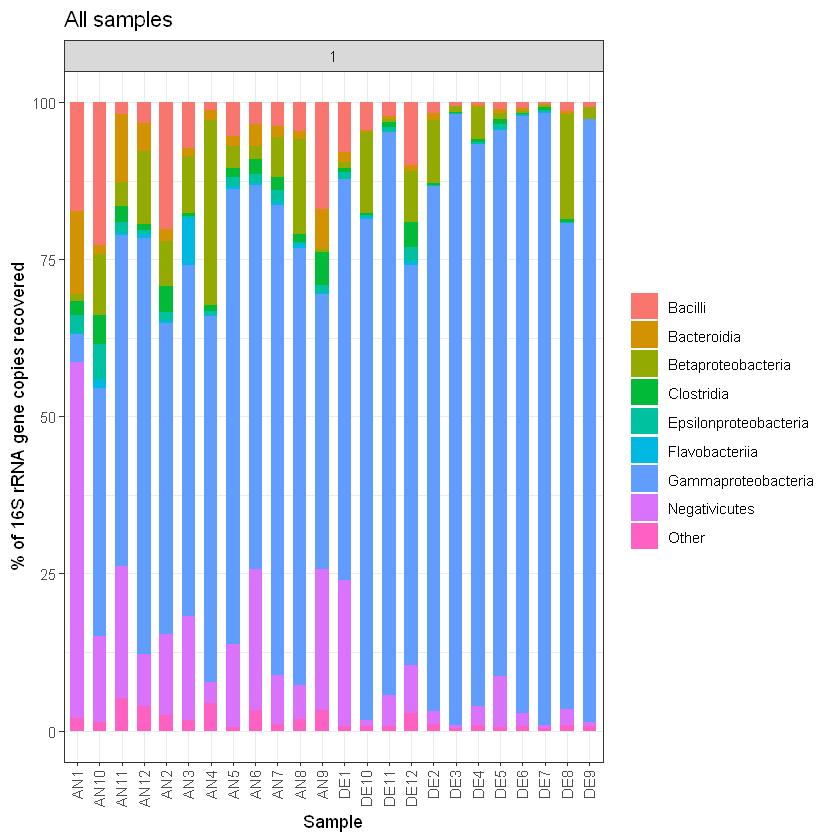

In [33]:
stack_plot <- ggplot(clases_stack.g, aes(x=Sample, y=Proportion, fill=Major_Taxa)) +
  geom_bar(width=0.6, stat="identity") +
  theme_bw() +
  theme(axis.text.x=element_text(angle=90, vjust=0.4, hjust=1), legend.title=element_blank()) +
  labs(x="Sample", y="% of 16S rRNA gene copies recovered", title="All samples") +
 facet_grid(~1, scales = 'free_x', space = 'free_x')

stack_plot

In [34]:
library(ampvis2)

In [35]:
obj <- ASV_physeq
otutable <- data.frame(OTU = rownames(phyloseq::otu_table(obj)@.Data),
                       phyloseq::otu_table(obj)@.Data,
                       phyloseq::tax_table(obj)@.Data,
                       check.names = FALSE)

In [36]:
metadataX <- data.frame(phyloseq::sample_data(obj), 
                       check.names = FALSE)

In [37]:
library(data.table)
metadataX <-setDT(metadataX, keep.rownames = TRUE)[]


Attaching package: 'data.table'


The following object is masked from 'package:dendextend':

    set


The following object is masked from 'package:SummarizedExperiment':

    shift


The following object is masked from 'package:GenomicRanges':

    shift


The following object is masked from 'package:IRanges':

    shift


The following objects are masked from 'package:S4Vectors':

    first, second


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




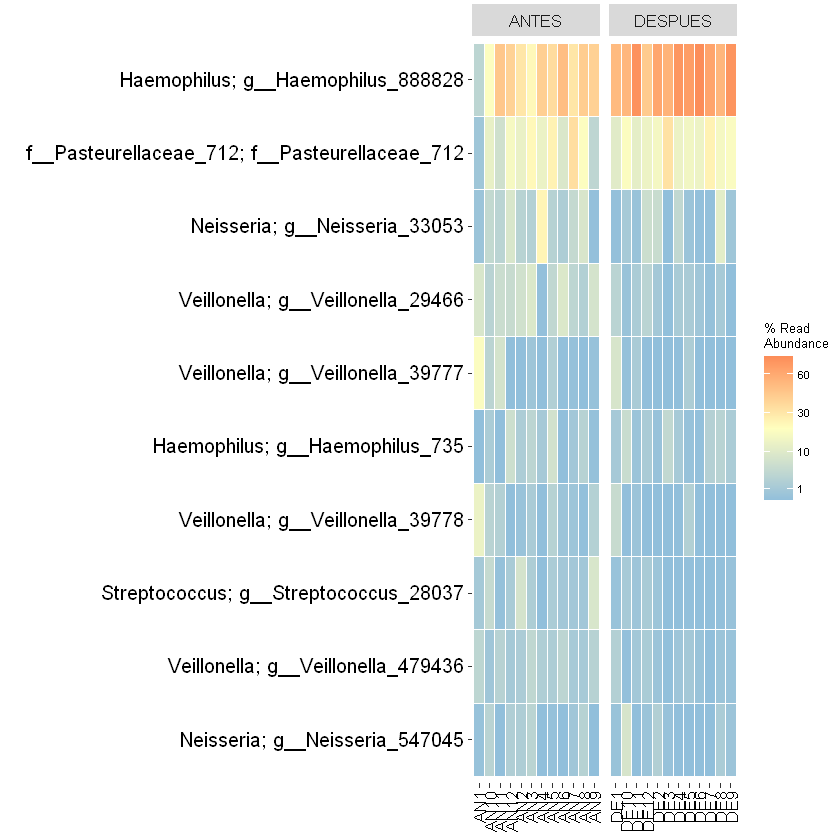

In [40]:
av2 <- amp_load(otutable, metadataX)
#Phylum and Class
heat_map_plot <- amp_heatmap(av2, 
            group_by = "CODE", 
            facet_by = "TYPE", 
            plot_values = FALSE,
            tax_show = 10,
            tax_aggregate = "Species",
            tax_add = "Genus",
            plot_colorscale = "sqrt",
            plot_legendbreaks = c(1, 10, 30, 60))

heat_map_plot

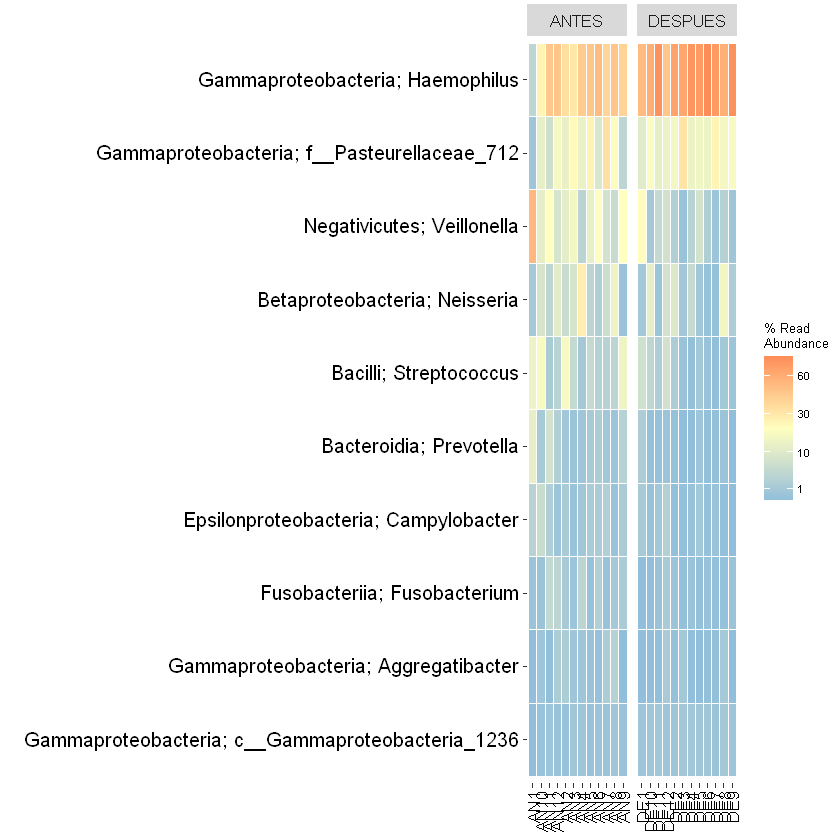

In [39]:
amp_heatmap(av2, 
            group_by = "CODE", 
            facet_by = "TYPE", 
            plot_values = FALSE,
            tax_show = 10,
            tax_aggregate = "Genus",
            tax_add = "Class",
            plot_colorscale = "sqrt",
            plot_legendbreaks = c(1, 10, 30, 60))